### Leave-One-Out (Validare incrucisata)

In [1]:
import csv
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

### Functii de loss

In [2]:
df = pd.read_csv("data/world-happiness-report-2017.csv")

df.dropna()

inputs = df["Economy..GDP.per.Capita."]
outputs = df["Happiness.Score"]

# impartire in training si testing data
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

- squared error
(media patratelor diferentelor dintr valorile reale si predictiile modelului)

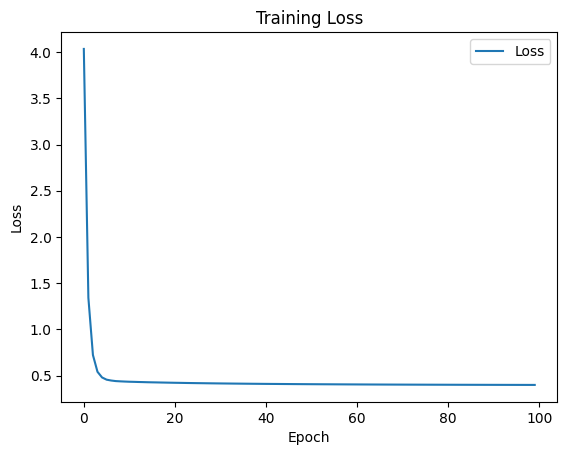

In [3]:
regressor = linear_model.SGDRegressor(loss="squared_error")
xx_train = [[el] for el in trainInputs]
xx_test = [[el] for el in testInputs]

losses = []

epochs = 100
for _ in range(epochs):
    regressor.partial_fit(xx_train, trainOutputs)

    computed_output = regressor.predict(xx_test)

    loss = metrics.mean_squared_error(y_true=testOutputs, y_pred=computed_output)
    losses.append(loss)

plt.plot(losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

- huber

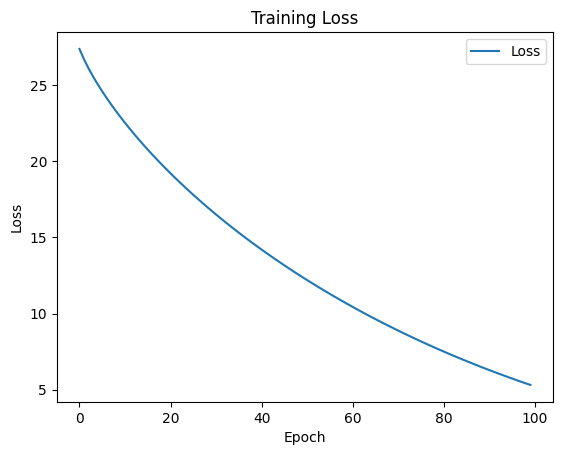

In [4]:
regressor = linear_model.SGDRegressor(loss="huber")
xx_train = [[el] for el in trainInputs]
xx_test = [[el] for el in testInputs]

losses = []

epochs = 100
for _ in range(epochs):
    regressor.partial_fit(xx_train, trainOutputs)

    computed_output = regressor.predict(xx_test)

    loss = metrics.mean_squared_error(y_true=testOutputs, y_pred=computed_output)
    losses.append(loss)

plt.plot(losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()


- epsilon insensitive

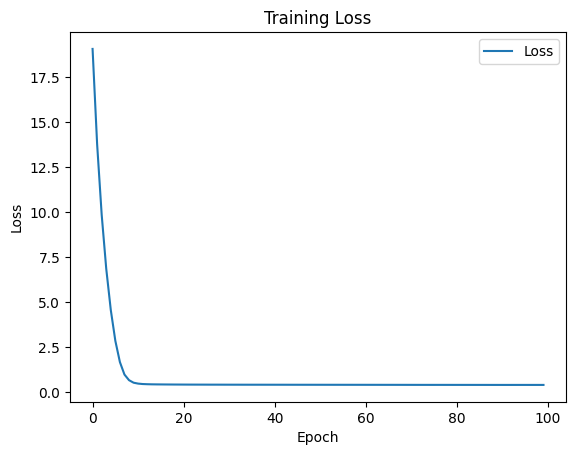

In [5]:
regressor = linear_model.SGDRegressor(loss="epsilon_insensitive")
xx_train = [[el] for el in trainInputs]
xx_test = [[el] for el in testInputs]

losses = []

epochs = 100
for _ in range(epochs):
    regressor.partial_fit(xx_train, trainOutputs)

    computed_output = regressor.predict(xx_test)

    loss = metrics.mean_squared_error(y_true=testOutputs, y_pred=computed_output)
    losses.append(loss)

plt.plot(losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()


Ce se întamplă în cazul clasificarii binare daca se modifică pragul de decizie din 0.5 în alte valori. <br> 
Cum se poate aprecia calitatea clasificatorului pentru diferite valori ale pragului?

- daca pragul de decizie scade (0.5 <), clasificatorul nu are nevoie de multa 'incredere' pentru a clasifica o predictie ca fiind corecta.
- daca pragul de decizie creste, clasificatorul are nevoie de multa 'incredere' pentru a clasifica o predictie ca fiind corecta.


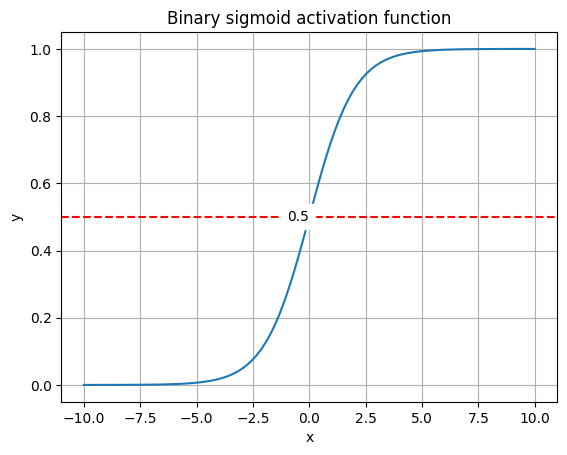

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100) 
sigmoid = 1 / (1 + np.exp(-x))

plt.plot(x, sigmoid)
plt.xlabel('x')
plt.ylabel('y')
plt.title('')

plt.axhline(y=0.5, color='r', linestyle='--')
plt.text(0, 0.5, '0.5', va='center', ha='right', backgroundcolor='w')
plt.title("Binary sigmoid activation function")

plt.grid(True)
plt.show()
